In [32]:
!pip install feedparser
!pip install beautifulsoup4
!pip install janome

In [33]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [34]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import feedparser
import pandas as pd
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import re

In [35]:
#WordCloudで日本語を表示するためフォントを指定
FONT_PATH = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

In [36]:
def get_word_str(text):
  #形態素解析
  t = Tokenizer()
  token = t.tokenize(text)
  word_list = []
  for line in token:
      tmp = re.split('\t|,', str(line))
      # 名詞のみ対象
      if tmp[1] in ["名詞"]:
          # 一般,固有名詞のみ対象
          if tmp[2] in ["一般", "固有名詞"]:
              word_list.append(tmp[0])

  return " " . join(word_list)

In [37]:
# RSSフィードのURL
RSS_URL = "https://smhn.info/feed"
d = feedparser.parse(RSS_URL)

word_str = ""

if RSS_URL:
  # RSSフィードのパース
  d = feedparser.parse(RSS_URL)
  for item in d.entries:
    if hasattr(item, 'description')or hasattr(item, 'content'):
      # HTMLタグの除去
      soup = BeautifulSoup(item.description, 'html.parser')
      text = soup.get_text()
      # 特殊文字や記号の除去
      text = re.sub(r'[^\w\s]', '', text)
      # 名詞の抽出
      word_str += " " + get_word_str(text)

In [38]:
#WordCloudを作成
wc = WordCloud(font_path=FONT_PATH).generate(word_str)

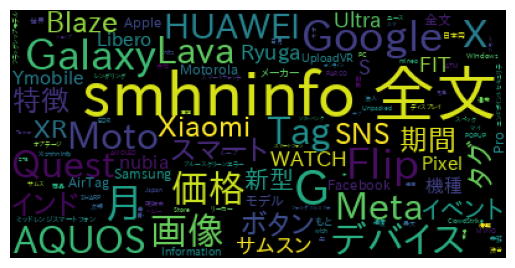

In [40]:
#wcを表示
plt.imshow(wc)
plt.axis('off')
plt.show()